## Chapter 4

In [119]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Example 4.2

In [99]:
dt = 0.001

# Ensemble size
M = 1000
x0 = 0
y0 = 0
z0 = 0

Nout = 50
STEPS = 2000

x = np.zeros((M,STEPS+1))
y = np.zeros((M,STEPS+1))
z = np.zeros((M,STEPS+1))
t = np.zeros((STEPS+1))

x[:,0] = x0 + 0.1 * np.random.randn(M)
y[:,0] = y0 + 0.1 * np.random.randn(M)
z[:,0] = z0 + 0.1 * np.random.randn(M)
t[0] = 0.

for j in range(STEPS):
    xh = x[:,j]
    yh = y[:,j]
    zh = z[:,j]
    
    for i in range(Nout):
        xo = xh
        yo = yh
        zo = zh
        
        xh = xo + dt * 10. * (yo - xo)
        yh = yo + dt * (xo * (28. - zo) - yo)
        zh = zo + dt * (xo * yo - 8./3 * zo)
        
    x[:,j+1] = xh
    y[:,j+1] = yh
    z[:,j+1] = zh
    
    t[j+1] = dt * Nout * (j + 1)
    
x_model = x
y_model = y
z_model = z
time_model = t

<IPython.core.display.Javascript object>


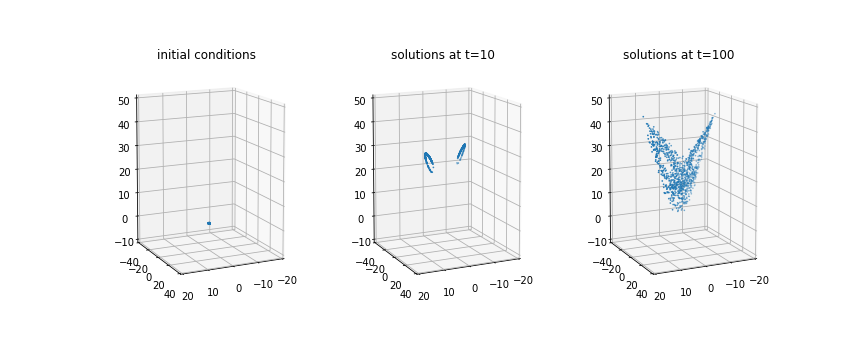

In [105]:
from mpl_toolkits.mplot3d import Axes3D
def plt3d(i, n, title):
    ax = fig1.add_subplot(1, 3, i, projection='3d')
    ax.set_xlim([-20.,20.])
    ax.set_ylim([-40.,40.])
    ax.set_zlim([-10.,50.])
    ax.view_init(elev=10, azim=65)
    ax.set_title(title)
    return ax.scatter(x[:,n],y[:,n],z[:,n],s=0.5)
    
fig1 = plt.figure(figsize=(12,5))
plt3d(1,0,'initial conditions')
plt3d(2,200,'solutions at t=10')
plt3d(3,2000,'solutions at t=100')
plt.show()

### Example 4.8

In [110]:
dt = 0.001

x0 = 0.
y0 = 0.
z0 = 0.

Nout = 50
STEPS = 100000

r1 = np.zeros((Nout))
r2 = np.zeros((Nout))
r3 = np.zeros((Nout))

a = 1./np.sqrt(dt)
fakt = 1.99999

g1 = a * (1. / np.sqrt(2.) - .5)
g2 = a * (1. / np.sqrt(3.) - .5)
g3 = a * (1. / np.sqrt(5.) - .5)

x = np.zeros((STEPS+1))
y = np.zeros((STEPS+1))
z = np.zeros((STEPS+1))
t = np.zeros((STEPS+1))

x[0] = x0
y[0] = y0
z[0] = z0
t[0] = 0.

def gi(g):
    if ((g >= -a/2) and (g <0)):
        return a * (fakt * g/a + .5)
    else:
        return a * (-fakt * g/a + .5)
    
for j in range(STEPS):
    xh = x[j]
    yh = y[j]
    zh = z[j]
    
    for i in range(Nout):
        xo = xh
        yo = yh
        zo = zh
        
        g1 = gi(g1)
        g2 = gi(g2)
        g3 = gi(g3)
        
        xh = xo + dt * g1
        yh = yo + dt * g2
        zh = zo + dt * g3
        
    x[j+1] = xh
    y[j+1] = yh
    z[j+1] = zh
    t[j+1] = dt * Nout * (j+1)

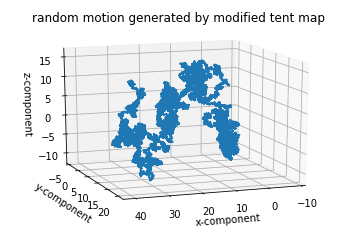

In [120]:
fig2 = plt.figure()
ax = fig2.add_subplot(1, 1, 1, projection='3d')
ax.plot(x,y,z)
ax.set_xlabel('x-component')
ax.set_ylabel('y-component')
ax.set_zlabel('z-component')
ax.view_init(elev=15, azim=70)
ax.set_title('random motion generated by modified tent map')
plt.show()

mean(x) = 0.0004
mean(y) = 0.0001
mean(z) = 0.0001
var(x) = 0.0829
var(y) = 0.0832
var(z) = 0.0830


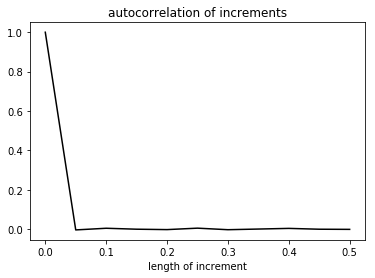

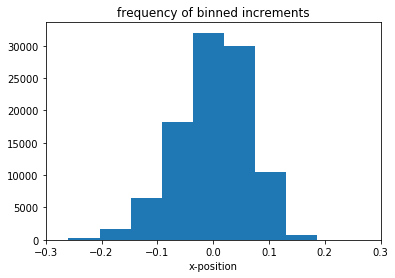

In [197]:
increment_x = x[1:STEPS+1] - x[:STEPS]
increment_y = y[1:STEPS+1] - y[:STEPS]
increment_z = z[1:STEPS+1] - z[:STEPS]

print("mean(x) = %.4f" %(np.mean(increment_x)))
print("mean(y) = %.4f" %(np.mean(increment_y)))
print("mean(z) = %.4f" %(np.mean(increment_z)))

sx = np.var(increment_x)/(dt*Nout)
sy = np.var(increment_y)/(dt*Nout)
sz = np.var(increment_z)/(dt*Nout)

print("var(x) = %.4f" %(sx))
print("var(y) = %.4f" %(sy))
print("var(z) = %.4f" %(sz))

p = 11
corr = np.zeros((p))

for j in range(p):
    for i in range(j,STEPS):
        corr[j] += increment_x[i] * increment_x[i-j]
    corr[j] /= (STEPS - j)
    
corr /= corr[0]

fig3 = plt.figure()
plt.plot(np.arange(p)*dt*Nout, corr, 'k')
plt.xlabel("length of increment")
plt.title("autocorrelation of increments")
plt.show()

fig4 = plt.figure()
plt.hist(increment_x)
plt.title("frequency of binned increments")
plt.xlabel("x-position")
plt.xlim([-0.3,0.3])
plt.show()

In [207]:
X = np.zeros((STEPS+1))
Y = np.zeros((STEPS+1))
Z = np.zeros((STEPS+1))

dtout = Nout * dt

for j in range(STEPS):
    X[j+1] = X[j] + np.sqrt(sx * dtout) * np.random.randn()
    Y[j+1] = Y[j] + np.sqrt(sy * dtout) * np.random.randn()
    Z[j+1] = Z[j] + np.sqrt(sz * dtout) * np.random.randn()

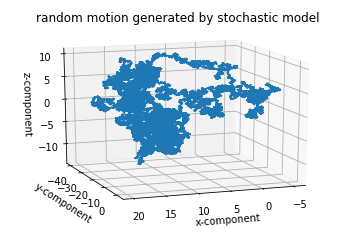

In [208]:
fig5 = plt.figure()
ax = fig5.add_subplot(1, 1, 1, projection='3d')
ax.plot(X,Y,Z)
ax.set_xlabel('x-component') 
ax.set_ylabel('y-component')
ax.set_zlabel('z-component')
ax.view_init(elev=15, azim=70)
ax.set_title('random motion generated by stochastic model')
plt.show()

### Example 4.13

In [250]:
# surrogate model
dt = 0.001

x0 = -0.587
y0 = -0.563
z0 = 16.870

Nout = 50
STEPS = 4000

a = 1./np.sqrt(dt)
fac = 1.99999

g1 = a * (1. / np.sqrt(2.) - .5)
g2 = a * (1. / np.sqrt(3.) - .5)
g3 = a * (1. / np.sqrt(5.) - .5)

x = np.zeros((STEPS+1))
y = np.zeros((STEPS+1))
z = np.zeros((STEPS+1))
t = np.zeros((STEPS+1))

x[0] = x0
y[0] = y0
z[0] = z0
t[0] = 0.

def gi(g):
    if ((g >= -a/2) and (g < 0)):
        return a * (fakt * g/a + .5)
    else:
        return a * (-fakt * g/a + .5)
    
for j in range(STEPS):
    xh = x[j]
    yh = y[j]
    zh = z[j]

    for i in range(Nout):
        xo = xh
        yo = yh
        zo = zh
        
        g1 = gi(g1)
        g2 = gi(g2)
        g3 = gi(g3)

        xh = xo + dt * 10. * (yo - xo) + dt * g1
        yh = yo + dt * (xo * (28. - zo) - yo) + dt * g2
        zh = zo + dt * (xo * yo - 8./3 * zo) + dt * g3

    x[j+1] = xh
    y[j+1] = yh
    z[j+1] = zh
    t[j+1] = dt * Nout * (j+1)
            
nf1 = dt * g1
nf2 = dt * g2
nf3 = dt * g3
x_nature, y_nature, z_nature, t_nature = x,y,z,t

# stochastic model
x = np.zeros((STEPS+1))
y = np.zeros((STEPS+1))
z = np.zeros((STEPS+1))
t = np.zeros((STEPS+1))

x[0] = x0
y[0] = y0
z[0] = z0
t[0] = 0.

var = 0.0838

sf1 = np.sqrt(dt * var) * np.random.randn()
sf2 = np.sqrt(dt * var) * np.random.randn()
sf3 = np.sqrt(dt * var) * np.random.randn()

for j in range(STEPS):
    xh = x[j]
    yh = y[j]
    zh = z[j]

    for i in range(Nout):
        xo = xh
        yo = yh
        zo = zh

        xh = xo + dt * 10. * (yo - xo) + np.sqrt(dt * var) * np.random.randn()
        yh = yo + dt * (xo * (28. - zo) - yo) + np.sqrt(dt * var) * np.random.randn()
        zh = zo + dt * (xo * yo - 8./3 * zo) + np.sqrt(dt * var) * np.random.randn()

    x[j+1] = xh
    y[j+1] = yh
    z[j+1] = zh
    t[j+1] = dt * Nout * (j+1)

x_model, y_model, z_model, t_model = x,y,z,t

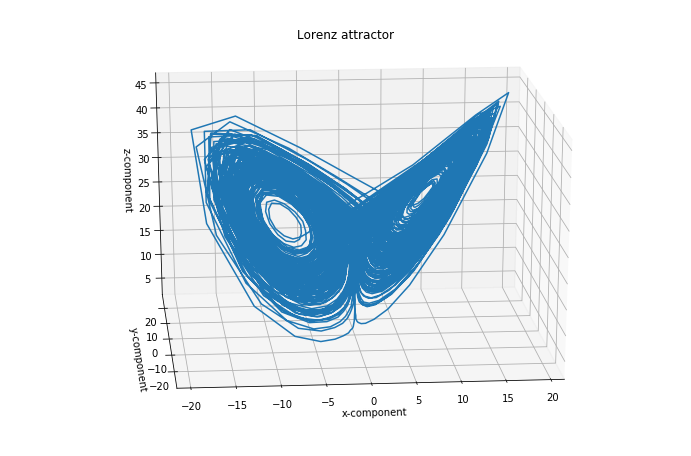

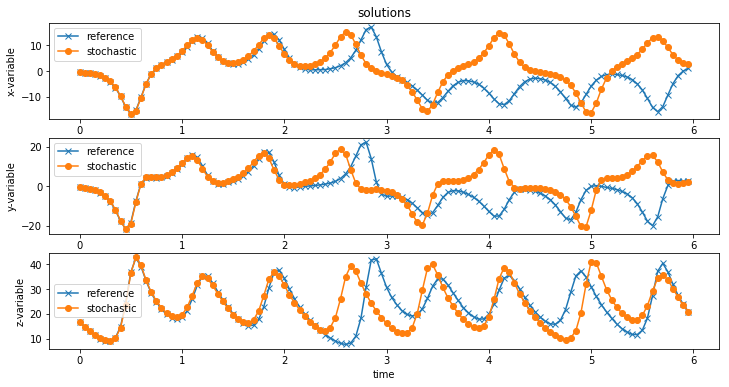

In [267]:
fig6 = plt.figure(figsize=(12,8))
ax = fig6.add_subplot(1, 1, 1, projection='3d')
ax.plot(x_model,y_model,z_model)
ax.set_xlabel('x-component') 
ax.set_ylabel('y-component')
ax.set_zlabel('z-component')
ax.view_init(elev=20, azim=-95)
ax.set_title('Lorenz attractor')
plt.show()

I = 120

fig7 = plt.figure(figsize=(12,6))
ax = fig7.add_subplot(3, 1, 1)
ax.plot(t_nature[:I],x_nature[:I],'x-',label='reference')
ax.plot(t_nature[:I],x_model[:I],'o-',label='stochastic')
ax.set_title("solutions")
ax.set_ylabel("x-variable")
ax.legend()
ax = fig7.add_subplot(3, 1, 2)
ax.plot(t_nature[:I],y_nature[:I],'x-',label='reference')
ax.plot(t_nature[:I],y_model[:I],'o-',label='stochastic')
ax.set_ylabel("y-variable")
ax.legend()
ax = fig7.add_subplot(3, 1, 3)
ax.plot(t_nature[:I],z_nature[:I],'x-',label='reference')
ax.plot(t_nature[:I],z_model[:I],'o-',label='stochastic')
ax.set_ylabel("z-variable")
ax.set_xlabel("time")
ax.legend()
plt.show()

In [270]:
# deterministic model
x = np.zeros((STEPS+1))
y = np.zeros((STEPS+1))
z = np.zeros((STEPS+1))
t = np.zeros((STEPS+1))

x[0] = x0
y[0] = y0
z[0] = z0
t[0] = 0.

var = 0.

for j in range(STEPS):
    xh = x[j]
    yh = y[j]
    zh = z[j]

    for i in range(Nout):
        xo = xh
        yo = yh
        zo = zh

        xh = xo + dt * 10. * (yo - xo) + np.sqrt(dt * var) * np.random.randn()
        yh = yo + dt * (xo * (28. - zo) - yo) + np.sqrt(dt * var) * np.random.randn()
        zh = zo + dt * (xo * yo - 8./3 * zo) + np.sqrt(dt * var) * np.random.randn()

    x[j+1] = xh
    y[j+1] = yh
    z[j+1] = zh
    t[j+1] = dt * Nout * (j+1)

x_modeld, y_modeld, z_modeld, t_modeld = x,y,z,t

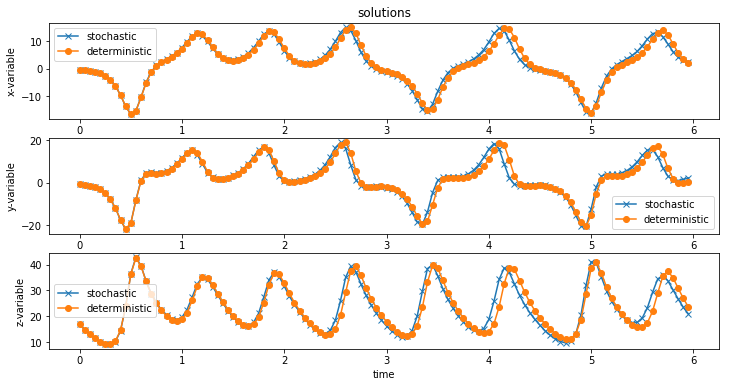

In [271]:
fig8 = plt.figure(figsize=(12,6))
ax = fig8.add_subplot(3, 1, 1)
ax.plot(t_nature[:I],x_model[:I],'x-',label='stochastic')
ax.plot(t_nature[:I],x_modeld[:I],'o-',label='deterministic')
ax.set_title("solutions")
ax.set_ylabel("x-variable")
ax.legend()
ax = fig8.add_subplot(3, 1, 2)
ax.plot(t_nature[:I],y_model[:I],'x-',label='stochastic')
ax.plot(t_nature[:I],y_modeld[:I],'o-',label='deterministic')
ax.set_ylabel("y-variable")
ax.legend()
ax = fig8.add_subplot(3, 1, 3)
ax.plot(t_nature[:I],z_model[:I],'x-',label='stochastic')
ax.plot(t_nature[:I],z_modeld[:I],'o-',label='deterministic')
ax.set_ylabel("z-variable")
ax.set_xlabel("time")
ax.legend()
plt.show()

### Example 4.21

In [303]:
dt = 0.001

x0 = -0.587
y0 = -0.563
z0 = 16.87

N = 5
m = np.zeros((N))
variance0 = np.zeros((N,3))
mean0 = np.zeros((N,3))
variance1 = np.zeros((N,3))
mean1 = np.zeros((N,3))

# Deterministic Lorenz model
for l in range(N):
    
    # Ensemble size
    M = 10**(l+1)
    m[l] = M
    
    Nout = 50
    STEPS = 100
    
    x = np.zeros((M,STEPS+1))
    y = np.zeros((M,STEPS+1))
    z = np.zeros((M,STEPS+1))
    t = np.zeros((STEPS+1))
    
    x[:,0] = x0 + 0.1 * np.random.randn(M)
    y[:,0] = y0 + 0.1 * np.random.randn(M)
    z[:,0] = z0 + 0.1 * np.random.randn(M)

    variance0[l,0] = np.var(abs(x[:,0]))
    variance0[l,1] = np.var(y[:,0])
    variance0[l,2] = np.var(z[:,0])
    mean0[l,0] = np.mean(abs(x[:,0]))
    mean0[l,1] = np.mean(y[:,0])
    mean0[l,2] = np.mean(z[:,0])
    
    for j in range(0,STEPS):
        xh = x[:,j]
        yh = y[:,j]
        zh = z[:,j]

        for i in range(Nout):
            xo = xh
            yo = yh
            zo = zh
            
            xh = xo + dt * 10. * (yo - xo)
            yh = yo + dt * (xo * (28. - zo) - yo)
            zh = zo + dt * (xo * yo - 8./3 * zo)
            
        x[:,j+1] = xh
        y[:,j+1] = yh
        z[:,j+1] = zh
        
        t[j+1] = dt * Nout * (j+1)
        
    variance1[l,0] = np.var(abs(x[:,-1]))
    variance1[l,1] = np.var(y[:,-1]**2)
    variance1[l,2] = np.var(z[:,-1]**2)
    mean1[l,0] = np.mean(abs(x[:,-1]))
    mean1[l,1] = np.mean(y[:,-1]**2)
    mean1[l,2] = np.mean(z[:,-1]**2)

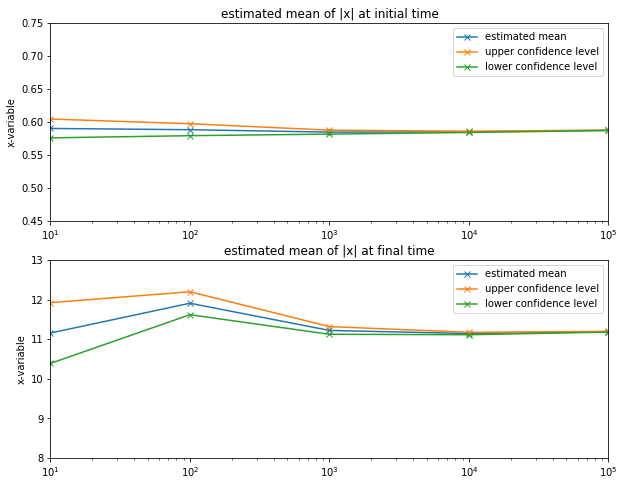

mean = [11.16114717 11.91456553 11.22652071 11.14856729 11.19401155]
variance = [6.53436428e-01 9.34362991e-02 1.04668816e-02 1.01199375e-03
 9.89154550e-05]


In [314]:
fig9 = plt.figure(figsize=(10,8))
ax = fig9.add_subplot(2, 1, 1)
ax.semilogx(m,mean0[:,0],'x-',label='estimated mean')
ax.semilogx(m,mean0[:,0]+0.95*np.sqrt(variance0[:,0]/m),'x-',label='upper confidence level')
ax.semilogx(m,mean0[:,0]-0.95*np.sqrt(variance0[:,0]/m),'x-',label='lower confidence level')
ax.set_title("solutions")
ax.set_ylabel("x-variable")
ax.set_xlim([10,100000])
ax.set_ylim([0.45,0.75])
ax.set_title("estimated mean of |x| at initial time")
ax.legend()
ax = fig9.add_subplot(2, 1, 2)
ax.semilogx(m,mean1[:,0],'x-',label='estimated mean')
ax.semilogx(m,mean1[:,0]+0.95*np.sqrt(variance1[:,0]/m),'x-',label='upper confidence level')
ax.semilogx(m,mean1[:,0]-0.95*np.sqrt(variance1[:,0]/m),'x-',label='lower confidence level')
ax.set_title("solutions")
ax.set_ylabel("x-variable")
ax.set_xlim([10,100000])
ax.set_ylim([8,13])
ax.set_title("estimated mean of |x| at final time")
ax.legend()
plt.show()

m1 = mean1[:,0]
v1 = variance1[:,0]/m

print("mean = %s" %(m1))
print("variance = %s" %(v1))

In [315]:
N = 5
m = np.zeros((N))
variance0 = np.zeros((N,3))
mean0 = np.zeros((N,3))
variance1 = np.zeros((N,3))
mean1 = np.zeros((N,3))

# Stochastically perturbed Lorenz model
varM = 0.0838

for l in range(N):
    
    # Ensemble size
    M = 10**(l+1)
    m[l] = M
    
    Nout = 50
    STEPS = 100
    
    x = np.zeros((M,STEPS+1))
    y = np.zeros((M,STEPS+1))
    z = np.zeros((M,STEPS+1))
    t = np.zeros((STEPS+1))
    
    x[:,0] = x0 + 0.1 * np.random.randn(M)
    y[:,0] = y0 + 0.1 * np.random.randn(M)
    z[:,0] = z0 + 0.1 * np.random.randn(M)

    variance0[l,0] = np.var(abs(x[:,0]))
    variance0[l,1] = np.var(y[:,0])
    variance0[l,2] = np.var(z[:,0])
    mean0[l,0] = np.mean(abs(x[:,0]))
    mean0[l,1] = np.mean(y[:,0])
    mean0[l,2] = np.mean(z[:,0])
    
    for j in range(0,STEPS):
        xh = x[:,j]
        yh = y[:,j]
        zh = z[:,j]

        for i in range(Nout):
            xo = xh
            yo = yh
            zo = zh
            
            xh = xo + dt * 10. * (yo - xo) + np.sqrt(dt * varM) * np.random.randn(M)
            yh = yo + dt * (xo * (28. - zo) - yo) + np.sqrt(dt * varM) * np.random.randn(M)
            zh = zo + dt * (xo * yo - 8./3 * zo) + np.sqrt(dt * varM) * np.random.randn(M)
            
        x[:,j+1] = xh
        y[:,j+1] = yh
        z[:,j+1] = zh
        
        t[j+1] = dt * Nout * (j+1)
        
    variance1[l,0] = np.var(abs(x[:,-1]))
    variance1[l,1] = np.var(y[:,-1]**2)
    variance1[l,2] = np.var(z[:,-1]**2)
    mean1[l,0] = np.mean(abs(x[:,-1]))
    mean1[l,1] = np.mean(y[:,-1]**2)
    mean1[l,2] = np.mean(z[:,-1]**2)

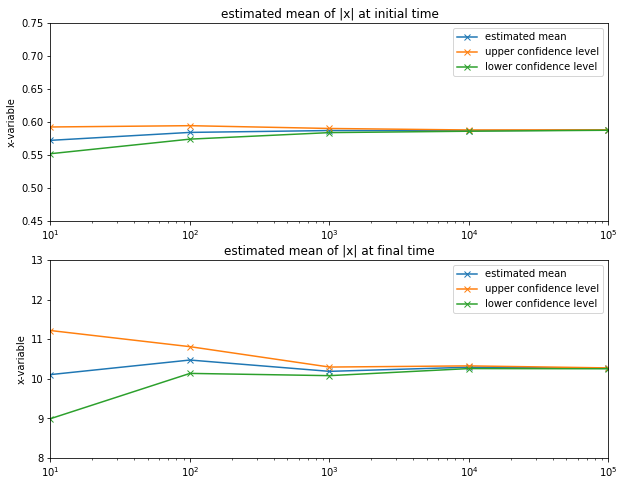

mean = [10.10950853 10.4780406  10.19170094 10.29604065 10.26789225]
variance = [1.37735295e+00 1.26610615e-01 1.31368884e-02 1.27463694e-03
 1.25561142e-04]


In [316]:
fig10 = plt.figure(figsize=(10,8))
ax = fig10.add_subplot(2, 1, 1)
ax.semilogx(m,mean0[:,0],'x-',label='estimated mean')
ax.semilogx(m,mean0[:,0]+0.95*np.sqrt(variance0[:,0]/m),'x-',label='upper confidence level')
ax.semilogx(m,mean0[:,0]-0.95*np.sqrt(variance0[:,0]/m),'x-',label='lower confidence level')
ax.set_title("solutions")
ax.set_ylabel("x-variable")
ax.set_xlim([10,100000])
ax.set_ylim([0.45,0.75])
ax.set_title("estimated mean of |x| at initial time")
ax.legend()
ax = fig10.add_subplot(2, 1, 2)
ax.semilogx(m,mean1[:,0],'x-',label='estimated mean')
ax.semilogx(m,mean1[:,0]+0.95*np.sqrt(variance1[:,0]/m),'x-',label='upper confidence level')
ax.semilogx(m,mean1[:,0]-0.95*np.sqrt(variance1[:,0]/m),'x-',label='lower confidence level')
ax.set_title("solutions")
ax.set_ylabel("x-variable")
ax.set_xlim([10,100000])
ax.set_ylim([8,13])
ax.set_title("estimated mean of |x| at final time")
ax.legend()
plt.show()

m2 = mean1[:,0]
v2 = variance1[:,0]/m

print("mean = %s" %(m2))
print("variance = %s" %(v2))

### Example 4.22

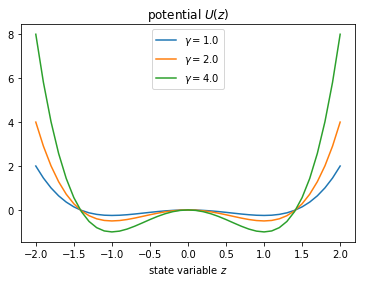

In [327]:
xgrid = np.arange(-2.,2.1,.1)

def func(gamma):
     return gamma * (xgrid**4 / 4 - xgrid**2 / 2)

fig11 = plt.figure()
for gamma in [1.,2.,4.]:
    plt.plot(xgrid,func(gamma), label=r"$\gamma = $"+str(gamma))
plt.legend()
plt.title(r"potential $U(z)$")
plt.xlabel(r"state variable $z$")
plt.show()

In [ ]:
# Dynamics (Euler-Maruyama)

# Ensemble size
N = 4
# gamma-values
G = 5

m = np.zeros((N,G))
g = np.zeros((N,G))
trans = np.zeros((N,G))

fig12 = plt.figure()
ax1 = fig12.add_subplot(2, 1, 1)
ax2 = fig12.add_subplot(2, 1, 2)

for l1 in range(N):
    for l2 in range(G):        
        M = 10**(l1+1)
        m[l1,l2] = M
        gamma = l2 + 1

        g[l1,l2] = 1. * gamma
        
        INNER = 100
        dt = 0.01
        STEPS = 1000
        
        # initial conditions
        x0 = 1. * np.ones((M))
        x = np.zeros((M,STEPS+1))
        t = np.zeros((STEPS+1))
        
        xo = x0
        
        for l3 in range(STEPS):
            for l4 in range(INNER):
                xo = xo - dt * gamma * (xo**3 - xo) + np.sqrt(.2 * dt) * np.random.randn(M)
            
            x[:,l3+1] = xo
            t[l3+1] = dt * INNER * (l3 + 1)
        
        trans[l1,l2] = float(len(np.where(x[:,-1] < 0.)[0]))/M
        if ((M == 10) and (gamma == 1)):
            ax1.plot(t,x[0,:])

        if ((M == 10) and (gamma == 2)):
            ax2.plot(t,x[0,:])
            
print(trans)